<a href="https://colab.research.google.com/github/Wanghley/smart-grid-forecast/blob/main/notebooks/EDA_timeseries_mixed_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
%pip install "dask[complete]" -q  # Install everything

In [95]:
import pandas as pd

In [96]:
import dask.dataframe as dd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
root_path = "/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data"

# Dataset Loading

In [98]:
path = root_path+"/pecan_weather_co2_merged_15min_resolution.csv" # need to change to your location when executing

In [99]:
df = pd.read_csv(path)
df.head()

,dataid,local_15min,air1,clotheswasher_dryg1,dishwasher1,disposal1,furnace1,grid,kitchenapp1,kitchenapp2,...,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,state_abbr,year,residential_co2,electric_power_co2
0,3687,2014-01-01 00:00:00-06,0.0,0.003,0.0,0.0,0.008,1.717,0.000,NaN,...,11.574,16.274,0.101,0.203,0.251,0.326,CA,2014,22.9,46.2
1,3687,2014-01-01 00:15:00-06,0.0,0.003,0.0,0.0,0.008,1.905,0.001,NaN,...,11.574,16.274,0.101,0.203,0.251,0.326,CA,2014,22.9,46.2
2,3687,2014-01-01 00:30:00-06,0.0,0.003,0.0,0.0,0.008,1.923,0.000,NaN,...,11.574,16.274,0.101,0.203,0.251,0.326,CA,2014,22.9,46.2
3,3687,2014-01-01 00:45:00-06,0.0,0.003,0.0,0.0,0.008,1.535,0.003,NaN,...,11.574,16.274,0.101,0.203,0.251,0.326,CA,2014,22.9,46.2
4,3687,2014-01-01 01:00:00-06,0.0,0.003,0.0,0.0,0.008,1.010,0.001,NaN,...,11.574,16.274,0.101,0.202,0.251,0.326,CA,2014,22.9,46.2


# Exploratory Data Analysis

In [100]:
# unique number of users
df['dataid'].nunique()

48

In [101]:
df.columns

Index(['dataid', 'local_15min', 'air1', 'clotheswasher_dryg1', 'dishwasher1',
       'disposal1', 'furnace1', 'grid', 'kitchenapp1', 'kitchenapp2',
       'microwave1', 'oven1', 'refrigerator1', 'solar', 'leg1v', 'leg2v',
       'location', 'time', 'latitude', 'longitude', 'hour', 'temperature_2m',
       'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature',
       'precipitation', 'rain', 'snowfall', 'snow_depth', 'weather_code',
       'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'et0_fao_evapotranspiration',
       'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m',
       'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm',
       'soil_moisture_28_to_100cm', 'soil_moisture_100_to_255cm

In [102]:
df['time'][:100].unique()

array(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
       '2014-01-01 02:00:00', '2014-01-01 03:00:00',
       '2014-01-01 04:00:00', '2014-01-01 05:00:00',
       '2014-01-01 06:00:00', '2014-01-01 07:00:00',
       '2014-01-01 08:00:00', '2014-01-01 09:00:00',
       '2014-01-01 10:00:00', '2014-01-01 11:00:00',
       '2014-01-01 12:00:00', '2014-01-01 13:00:00',
       '2014-01-01 14:00:00', '2014-01-01 15:00:00',
       '2014-01-01 16:00:00', '2014-01-01 17:00:00',
       '2014-01-01 18:00:00', '2014-01-01 19:00:00',
       '2014-01-01 20:00:00', '2014-01-01 21:00:00',
       '2014-01-01 22:00:00', '2014-01-01 23:00:00',
       '2014-01-02 00:00:00'], dtype=object)

Converting time to a datatime format to facilitate processing

In [103]:
df['time_high_res'] = pd.to_datetime(df['local_15min'], utc=True).dt.tz_convert(None)

In [104]:
df.head(2)

,dataid,local_15min,air1,clotheswasher_dryg1,dishwasher1,disposal1,furnace1,grid,kitchenapp1,kitchenapp2,...,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,state_abbr,year,residential_co2,electric_power_co2,time_high_res
0,3687,2014-01-01 00:00:00-06,0.0,0.003,0.0,0.0,0.008,1.717,0.000,NaN,...,16.274,0.101,0.203,0.251,0.326,CA,2014,22.9,46.2,2014-01-01 06:00:00
1,3687,2014-01-01 00:15:00-06,0.0,0.003,0.0,0.0,0.008,1.905,0.001,NaN,...,16.274,0.101,0.203,0.251,0.326,CA,2014,22.9,46.2,2014-01-01 06:15:00


In [105]:
df.describe()

,dataid,air1,clotheswasher_dryg1,dishwasher1,disposal1,furnace1,grid,kitchenapp1,kitchenapp2,microwave1,...,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,year,residential_co2,electric_power_co2,time_high_res
count,2.052647e+06,1.801283e+06,1.173221e+06,1.823016e+06,1.558640e+06,1.818948e+06,2.052647e+06,1.788663e+06,1.051993e+06,1.593776e+06,...,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2052647
mean,5.224519e+03,9.337036e-02,1.034623e-02,9.162230e-03,5.316686e-04,4.471710e-02,4.601721e-01,1.473856e-02,1.184242e-02,1.184614e-02,...,1.975797e+01,1.905038e+01,2.837170e-01,3.212957e-01,3.346796e-01,3.463823e-01,2.016068e+03,2.193419e+01,1.057109e+02,2016-08-02 09:16:24.816239360
min,2.700000e+01,-6.000000e-03,-1.000000e-03,-7.000000e-03,0.000000e+00,-1.000000e-03,-1.683100e+01,-3.000000e-03,-4.000000e-03,-6.000000e-03,...,1.017400e+01,7.346000e+00,5.500000e-02,1.680000e-01,2.350000e-01,2.440000e-01,2.014000e+03,1.080000e+01,2.140000e+01,2014-01-01 06:00:00
25%,2.606000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.990000e-01,0.000000e+00,0.000000e+00,5.000000e-03,...,1.559300e+01,1.592400e+01,2.070000e-01,2.460000e-01,2.860000e-01,3.280000e-01,2.014000e+03,1.340000e+01,3.360000e+01,2014-12-28 14:00:00
50%,4.934000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-03,3.390000e-01,0.000000e+00,0.000000e+00,5.000000e-03,...,1.982200e+01,1.917400e+01,3.100000e-01,3.250000e-01,3.190000e-01,3.460000e-01,2.015000e+03,2.290000e+01,4.620000e+01,2015-11-18 13:00:00
75%,8.061000e+03,0.000000e+00,2.000000e-03,0.000000e+00,0.000000e+00,8.000000e-03,6.270000e-01,6.000000e-03,7.000000e-03,6.000000e-03,...,2.314600e+01,2.212400e+01,3.870000e-01,3.890000e-01,3.790000e-01,3.640000e-01,2.018000e+03,2.480000e+01,2.149000e+02,2018-08-29 19:00:00
max,9.836000e+03,3.767000e+00,1.376000e+00,1.374000e+00,9.680000e-01,1.196000e+00,2.095500e+01,2.025000e+00,1.237000e+00,1.603000e+00,...,3.220850e+01,2.815850e+01,5.200000e-01,5.200000e-01,5.150000e-01,4.080000e-01,2.019000e+03,3.550000e+01,2.263000e+02,2019-11-01 04:45:00
std,3.023600e+03,3.686086e-01,5.898492e-02,7.774221e-02,1.598645e-02,1.180592e-01,1.006985e+00,5.107655e-02,3.800472e-02,3.627357e-02,...,5.158119e+00,4.429986e+00,1.292152e-01,8.763843e-02,6.078691e-02,3.107505e-02,1.904901e+00,8.574091e+00,8.894900e+01,NaN


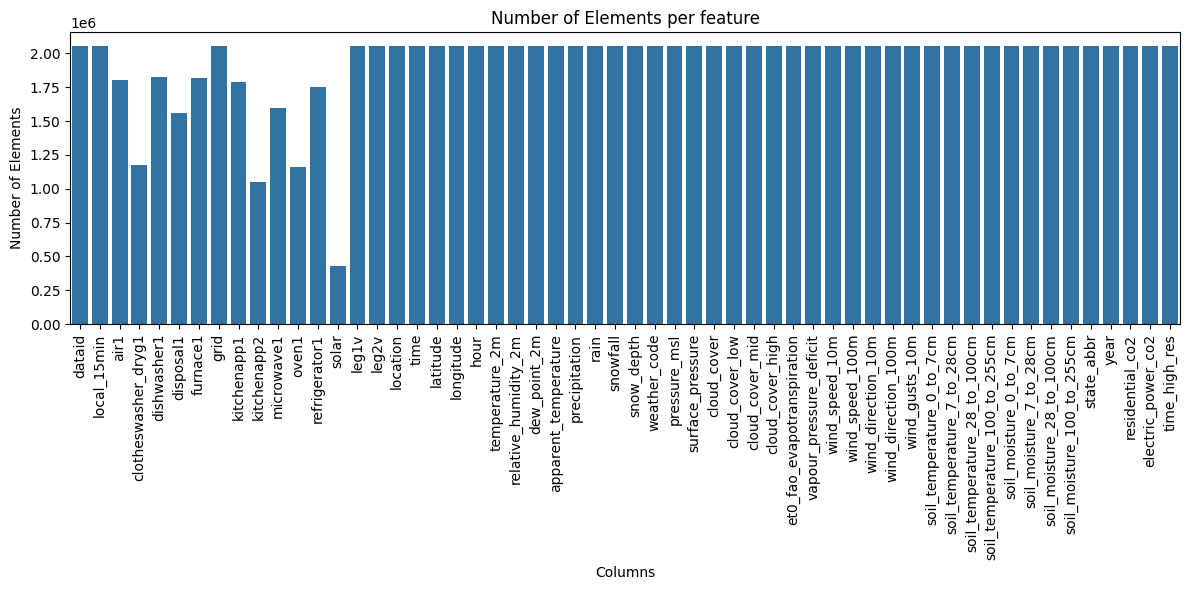

In [106]:
element_counts = df.count()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=element_counts.index, y=element_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Elements')
plt.title('Number of Elements per feature')
plt.tight_layout()
plt.show()


### Null value handling

In [107]:
cols_with_nulls = df.columns[df.isnull().any()].tolist()
print(cols_with_nulls)

['air1', 'clotheswasher_dryg1', 'dishwasher1', 'disposal1', 'furnace1', 'kitchenapp1', 'kitchenapp2', 'microwave1', 'oven1', 'refrigerator1', 'solar']


In [108]:
print(df.isnull().sum())

dataid                                 0
local_15min                            0
air1                              251364
clotheswasher_dryg1               879426
dishwasher1                       229631
disposal1                         494007
furnace1                          233699
grid                                   0
kitchenapp1                       263984
kitchenapp2                      1000654
microwave1                        458871
oven1                             895161
refrigerator1                     299703
solar                            1622264
leg1v                                  0
leg2v                                  0
location                               0
time                                   0
latitude                               0
longitude                              0
hour                                   0
temperature_2m                         0
relative_humidity_2m                   0
dew_point_2m                           0
apparent_tempera

In [109]:
for col in cols_with_nulls:
  if df[col].dtype in ['int64', 'float64']:
    # Use median imputation for numerical columns as it is less sensitive to outliers
    df[col] = df[col].fillna(df[col].median())
  else:
    # Use mode imputation for categorical columns
    df[col] = df[col].fillna(df[col].mode()[0])

In [110]:
print(df.isnull().sum())

dataid                           0
local_15min                      0
air1                             0
clotheswasher_dryg1              0
dishwasher1                      0
disposal1                        0
furnace1                         0
grid                             0
kitchenapp1                      0
kitchenapp2                      0
microwave1                       0
oven1                            0
refrigerator1                    0
solar                            0
leg1v                            0
leg2v                            0
location                         0
time                             0
latitude                         0
longitude                        0
hour                             0
temperature_2m                   0
relative_humidity_2m             0
dew_point_2m                     0
apparent_temperature             0
precipitation                    0
rain                             0
snowfall                         0
snow_depth          

### Data dictionary

| Field                    | Description                                            | Data Type | Units     | Notes                                                     |
| ------------------------ | ------------------------------------------------------ | --------- | --------- | --------------------------------------------------------- |
| **dataid**               | Unique record identifier                               | Integer   | —         | Auto-incremented or UUID                                  |
| **time**                 | Timestamp of measurement                               | Datetime  | ISO 8601  | e.g. `2025-06-26T21:00:00-04:00`                          |
| **air1**                 | Power draw of the air-conditioning circuit             | Float     | Kilo-Watts (kW) | Measured via CT clamp on “Air compressor” channel         |
| **clotheswasher\_dryg1** | Combined washer/dryer load                             | Float     | Kilo-Watts (kW) | May include both washer and dryer if on same CT loop      |
| **dishwasher1**          | Power draw of the dishwasher                           | Float     | Kilo-Watts (kW) |                                                           |
| **disposal1**            | Power draw of the garbage disposal                     | Float     | Kilo-Watts (kW) |                                                           |
| **furnace1**             | Power draw of the furnace                              | Float     | Kilo-Watts (kW) |                                                           |
| **grid**                 | Net grid import (+) or export (–)                      | Float     | Kilo-Watts (kW) | Positive → importing from grid; negative → exporting back |
| **kitchenapp1**          | Power draw of kitchen appliance group 1 (e.g. outlets) | Float     | Kilo-Watts (kW) | Label channels according to your panel mapping            |
| **kitchenapp2**          | Power draw of kitchen appliance group 2 (e.g. outlets) | Float     | Kilo-Watts (kW) |                                                           |
| **microwave1**           | Power draw of the microwave                            | Float     | Kilo-Watts (kW) |                                                           |
| **oven1**                | Power draw of the electric oven                        | Float     | Kilo-Watts (kW) |                                                           |
| **refrigerator1**        | Power draw of the refrigerator                         | Float     | Kilo-Watts (kW) |                                                           |
| **leg1v**                | Voltage on split-phase leg 1                           | Float     | Volts (V) |                                                           |
| **leg2v**                | Voltage on split-phase leg 2                           | Float     | Volts (V) |                                                           |

In terms of leg voltages:
That setup is a split-phase (often called “residential single-phase with two hot legs”) system, not a true three-phase service.

You’ve got two hot conductors (Leg 1 and Leg 2), each ~120 V relative to neutral, but 180° out of phase with each other.

Between Leg 1 and Leg 2 you’ll measure ~240 V, which is how you power heavy loads (like your oven or dryer).

A three-phase service would have three hot legs, each 120° apart, giving you three distinct phase-to-phase voltages (and typically higher total capacity).

### Data visualization

In [111]:
df.describe()

,dataid,air1,clotheswasher_dryg1,dishwasher1,disposal1,furnace1,grid,kitchenapp1,kitchenapp2,microwave1,...,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,year,residential_co2,electric_power_co2,time_high_res
count,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,...,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2.052647e+06,2052647
mean,5.224519e+03,8.193637e-02,5.913542e-03,8.137245e-03,4.037129e-04,4.042292e-02,4.601721e-01,1.284308e-02,6.069307e-03,1.031568e-02,...,1.975797e+01,1.905038e+01,2.837170e-01,3.212957e-01,3.346796e-01,3.463823e-01,2.016068e+03,2.193419e+01,1.057109e+02,2016-08-02 09:16:24.816239360
min,2.700000e+01,-6.000000e-03,-1.000000e-03,-7.000000e-03,0.000000e+00,-1.000000e-03,-1.683100e+01,-3.000000e-03,-4.000000e-03,-6.000000e-03,...,1.017400e+01,7.346000e+00,5.500000e-02,1.680000e-01,2.350000e-01,2.440000e-01,2.014000e+03,1.080000e+01,2.140000e+01,2014-01-01 06:00:00
25%,2.606000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e-03,1.990000e-01,0.000000e+00,0.000000e+00,5.000000e-03,...,1.559300e+01,1.592400e+01,2.070000e-01,2.460000e-01,2.860000e-01,3.280000e-01,2.014000e+03,1.340000e+01,3.360000e+01,2014-12-28 14:00:00
50%,4.934000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-03,3.390000e-01,0.000000e+00,0.000000e+00,5.000000e-03,...,1.982200e+01,1.917400e+01,3.100000e-01,3.250000e-01,3.190000e-01,3.460000e-01,2.015000e+03,2.290000e+01,4.620000e+01,2015-11-18 13:00:00
75%,8.061000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e-03,6.270000e-01,5.000000e-03,0.000000e+00,5.000000e-03,...,2.314600e+01,2.212400e+01,3.870000e-01,3.890000e-01,3.790000e-01,3.640000e-01,2.018000e+03,2.480000e+01,2.149000e+02,2018-08-29 19:00:00
max,9.836000e+03,3.767000e+00,1.376000e+00,1.374000e+00,9.680000e-01,1.196000e+00,2.095500e+01,2.025000e+00,1.237000e+00,1.603000e+00,...,3.220850e+01,2.815850e+01,5.200000e-01,5.200000e-01,5.150000e-01,4.080000e-01,2.019000e+03,3.550000e+01,2.263000e+02,2019-11-01 04:45:00
std,3.023600e+03,3.466561e-01,4.488666e-02,7.332163e-02,1.393239e-02,1.117793e-01,1.006985e+00,4.793377e-02,2.784385e-02,3.208996e-02,...,5.158119e+00,4.429986e+00,1.292152e-01,8.763843e-02,6.078691e-02,3.107505e-02,1.904901e+00,8.574091e+00,8.894900e+01,NaN


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052647 entries, 0 to 2052646
Data columns (total 56 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dataid                         int64         
 1   local_15min                    object        
 2   air1                           float64       
 3   clotheswasher_dryg1            float64       
 4   dishwasher1                    float64       
 5   disposal1                      float64       
 6   furnace1                       float64       
 7   grid                           float64       
 8   kitchenapp1                    float64       
 9   kitchenapp2                    float64       
 10  microwave1                     float64       
 11  oven1                          float64       
 12  refrigerator1                  float64       
 13  solar                          float64       
 14  leg1v                          float64       
 15  leg2v          

### Temporal views

### Electricity comparison

In [113]:
power_columns = ['air1', 'clotheswasher_dryg1', 'dishwasher1', 'disposal1', 'furnace1', 'kitchenapp1', 'kitchenapp2', 'microwave1', 'oven1', 'refrigerator1']

In [114]:
df['total_power'] = df[power_columns].sum(axis=1)

In [115]:
df['dataid'].unique()

array([3687, 6377, 7062, 8574, 9213,  203, 1450, 1524, 2606, 3864, 7114,
       1731, 4495, 8342, 3938, 5938, 8061, 9775, 4934, 8733, 9612, 9836,
       6547, 4550,  558, 2358, 3700, 1417, 5679, 5058, 2318, 5997,  950,
       5982, 5587, 1222,  387, 3000, 4283, 3488, 3517, 9053, 3996,   27,
        142,  914, 2096, 1240])

#### Single unit

In [116]:
df_3938 = df[df['dataid'] == 3938].copy()

In [117]:
df_3938.set_index('time_high_res', inplace=True)
df_3938.sort_index(inplace=True)

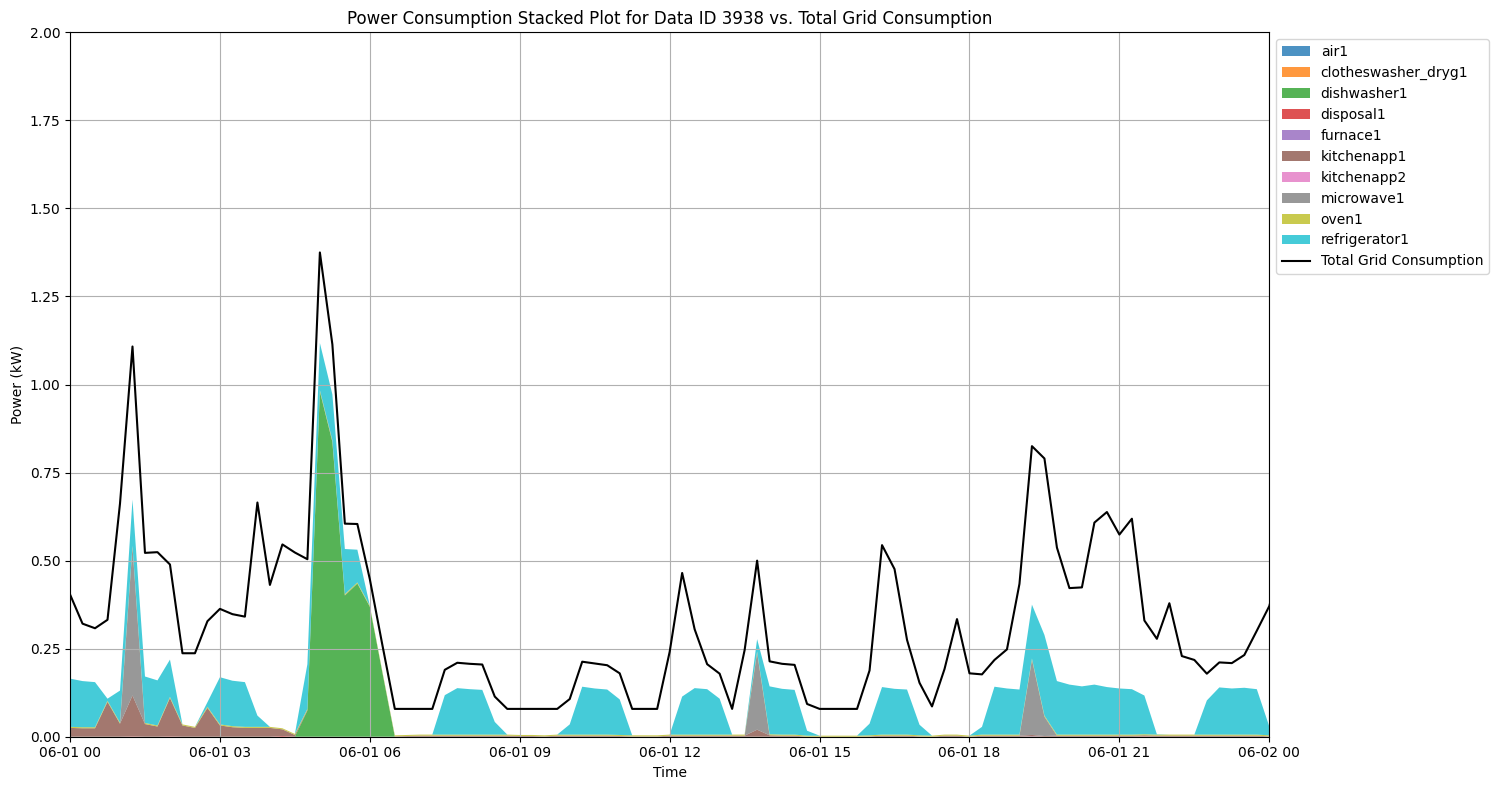

In [118]:
plt.figure(figsize=(15, 8))

# Create the stackplot for individual power columns
plt.stackplot(df_3938.index, [df_3938[col] for col in power_columns], labels=power_columns, alpha=0.8)

# Plot the total grid consumption
plt.plot(df_3938.index, df_3938['grid'], color='black', label='Total Grid Consumption')

plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.title('Power Consumption Stacked Plot for Data ID 3938 vs. Total Grid Consumption')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.xlim(datetime(2016, 6, 1), datetime(2016, 6, 2))
plt.ylim(0, 2)
plt.show()

In [119]:
df_3938['hour'] = df_3938.index.hour

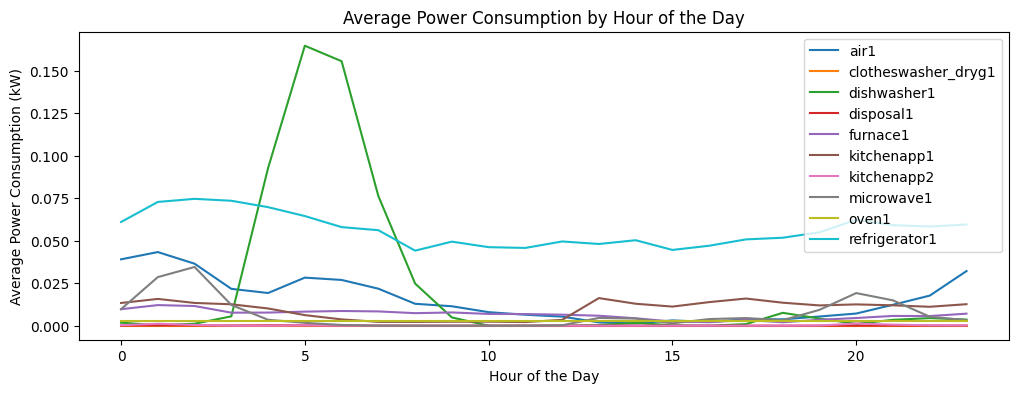

In [120]:
df_3938.groupby('hour')[power_columns].mean().plot(figsize=(12, 4))
plt.xlabel('Hour of the Day')
plt.ylabel('Average Power Consumption (kW)')
plt.title('Average Power Consumption by Hour of the Day')
plt.show()

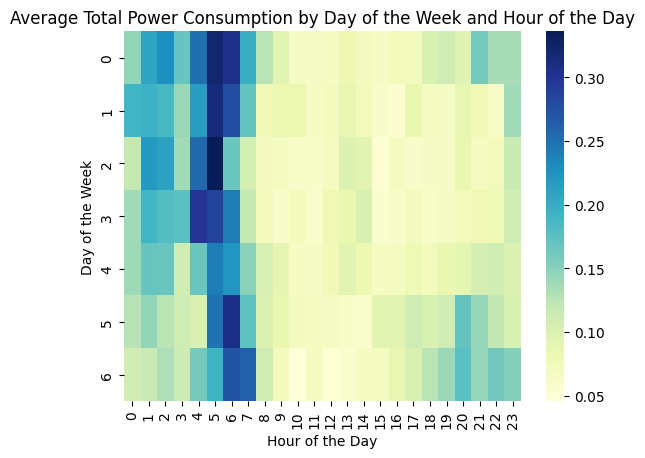

In [121]:
df_3938['dow'] = df_3938.index.dayofweek
df_3938['hour'] = df_3938.index.hour
pivot = df_3938.pivot_table(index='dow', columns='hour', values='total_power', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Average Total Power Consumption by Day of the Week and Hour of the Day')
plt.ylabel('Day of the Week')
plt.xlabel('Hour of the Day')
plt.show()


<Axes: >

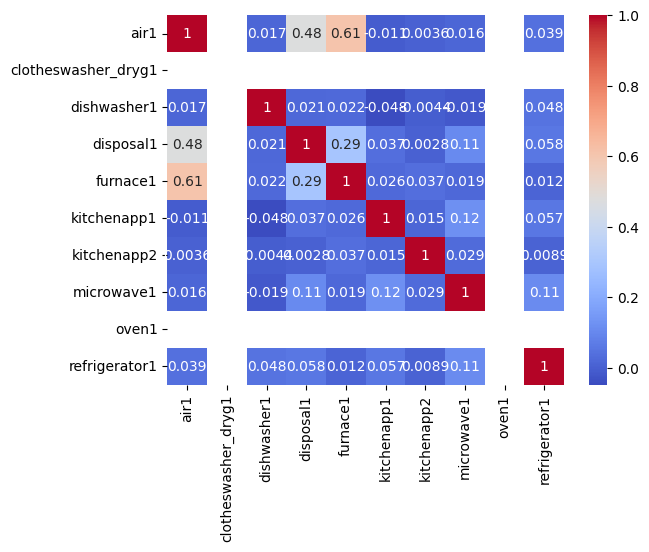

In [122]:
corr = df_3938[power_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

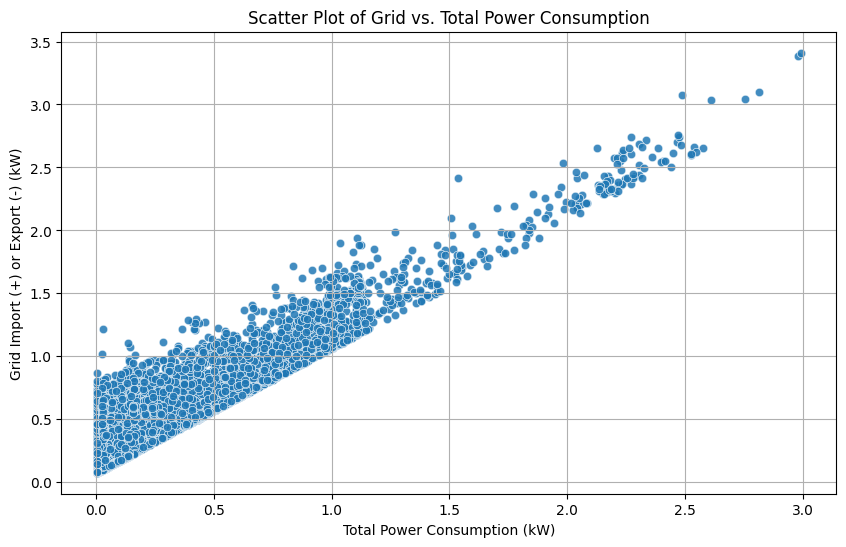

In [123]:
# Scatter plot: Grid vs total_power
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_3938, x='total_power', y='grid', alpha=0.6)
plt.xlabel('Total Power Consumption (kW)')
plt.ylabel('Grid Import (+) or Export (-) (kW)')
plt.title('Scatter Plot of Grid vs. Total Power Consumption')
plt.grid(True)
plt.show()

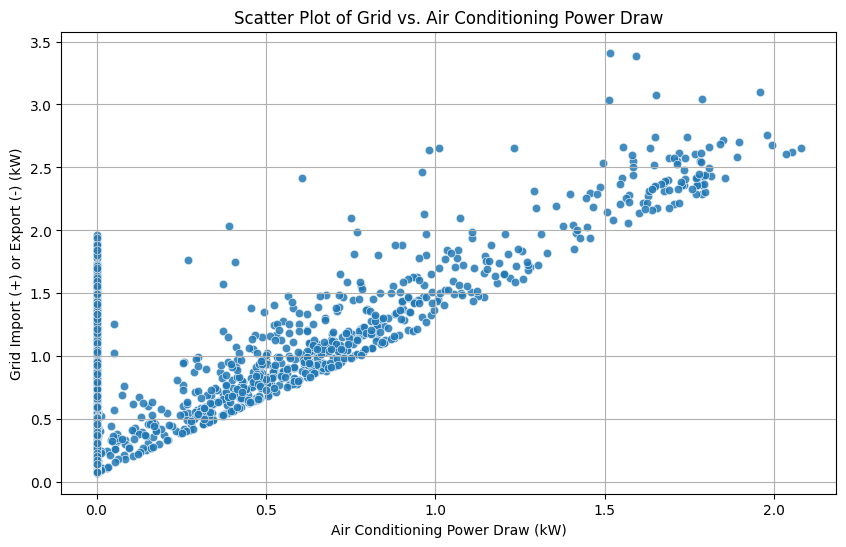

In [124]:
# Scatter plot: Grid vs air1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_3938, x='air1', y='grid', alpha=0.6)
plt.xlabel('Air Conditioning Power Draw (kW)')
plt.ylabel('Grid Import (+) or Export (-) (kW)')
plt.title('Scatter Plot of Grid vs. Air Conditioning Power Draw')
plt.grid(True)
plt.show()

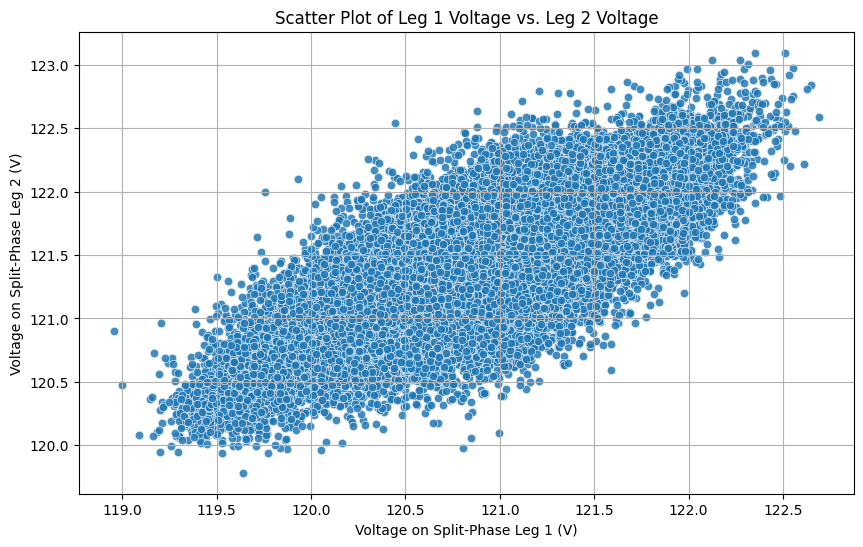

In [125]:
# Scatter plot: leg1v vs leg2v
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_3938, x='leg1v', y='leg2v', alpha=0.6)
plt.xlabel('Voltage on Split-Phase Leg 1 (V)')
plt.ylabel('Voltage on Split-Phase Leg 2 (V)')
plt.title('Scatter Plot of Leg 1 Voltage vs. Leg 2 Voltage')
plt.grid(True)
plt.show()

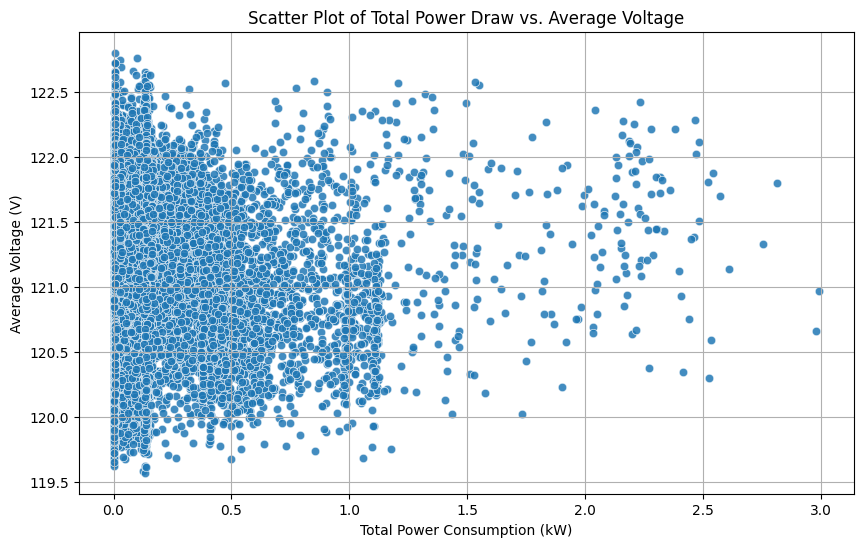

In [126]:
# Scatter plot: Voltage vs total power draw (using the average of leg1v and leg2v for voltage)
df_3938['average_voltage'] = (df_3938['leg1v'] + df_3938['leg2v']) / 2
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_3938, x='total_power', y='average_voltage', alpha=0.6)
plt.xlabel('Total Power Consumption (kW)')
plt.ylabel('Average Voltage (V)')
plt.title('Scatter Plot of Total Power Draw vs. Average Voltage')
plt.grid(True)
plt.show()

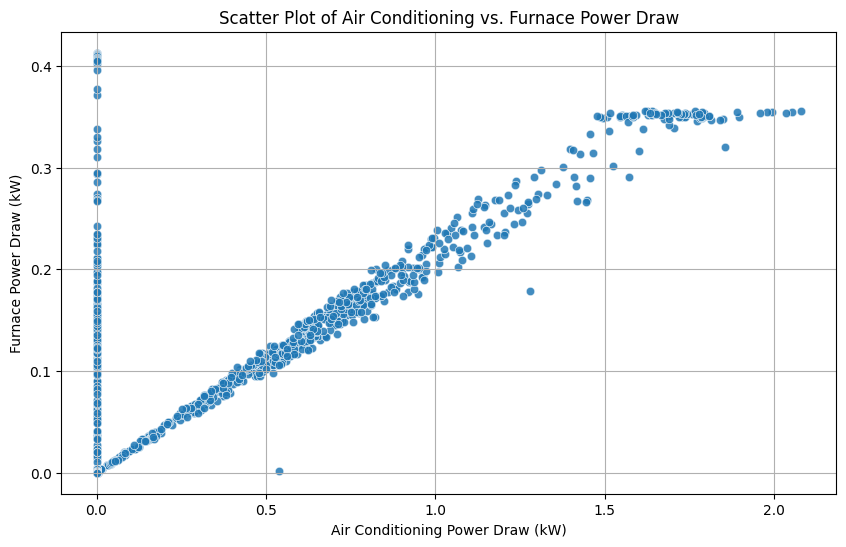

In [127]:
# Scatter plot: air1 vs furnace1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_3938, x='air1', y='furnace1', alpha=0.6)
plt.xlabel('Air Conditioning Power Draw (kW)')
plt.ylabel('Furnace Power Draw (kW)')
plt.title('Scatter Plot of Air Conditioning vs. Furnace Power Draw')
plt.grid(True)
plt.show()

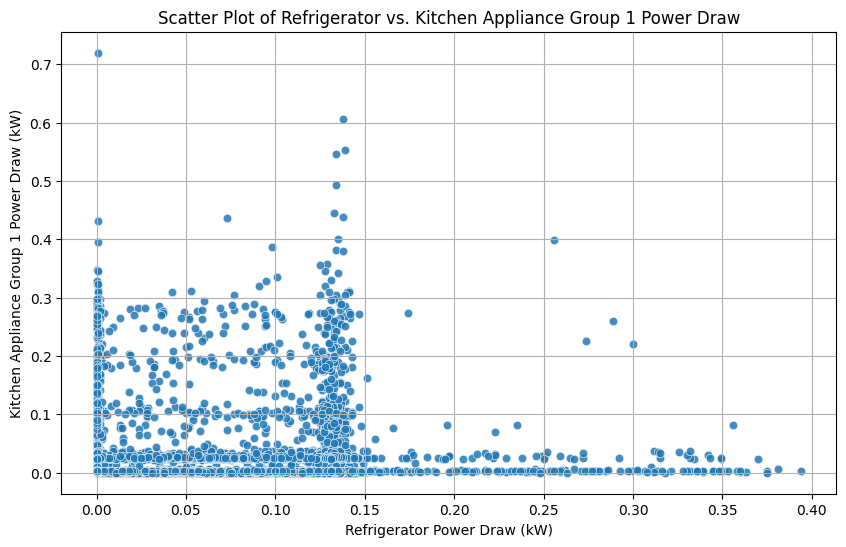

In [128]:
# Scatter plot: refrigerator1 vs kitchenapp1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_3938, x='refrigerator1', y='kitchenapp1', alpha=0.6)
plt.xlabel('Refrigerator Power Draw (kW)')
plt.ylabel('Kitchen Appliance Group 1 Power Draw (kW)')
plt.title('Scatter Plot of Refrigerator vs. Kitchen Appliance Group 1 Power Draw')
plt.grid(True)
plt.show()

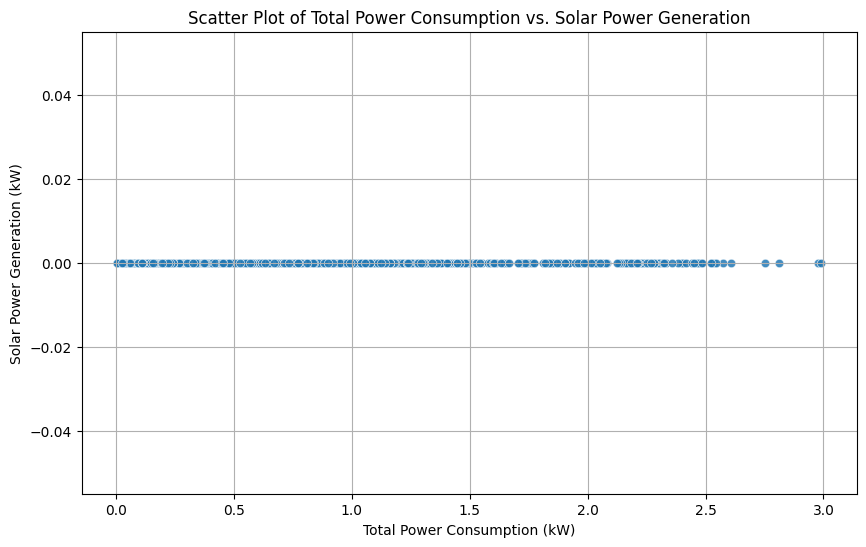

In [129]:
# Scatter plot: total_power vs solar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_3938, x='total_power', y='solar', alpha=0.6)
plt.xlabel('Total Power Consumption (kW)')
plt.ylabel('Solar Power Generation (kW)')
plt.title('Scatter Plot of Total Power Consumption vs. Solar Power Generation')
plt.grid(True)
plt.show()

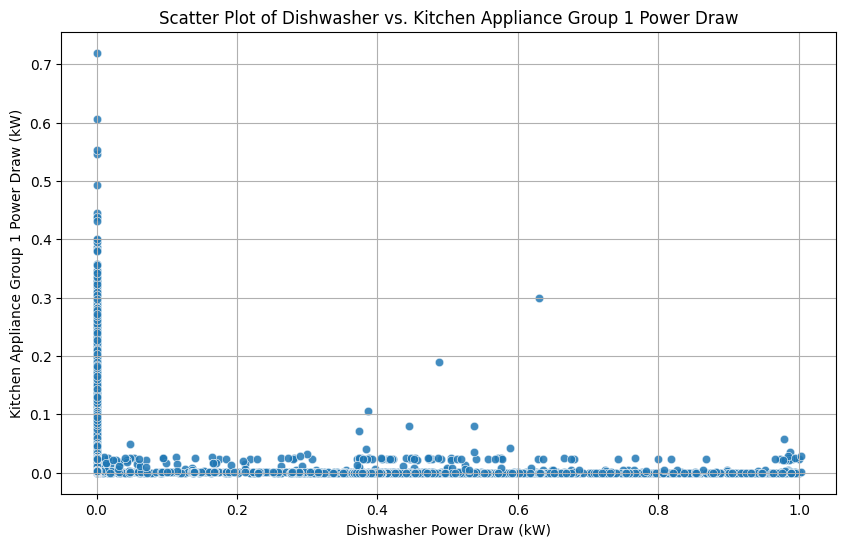

In [130]:
# Scatter plot: dishwasher1 vs kitchenapp1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_3938, x='dishwasher1', y='kitchenapp1', alpha=0.6)
plt.xlabel('Dishwasher Power Draw (kW)')
plt.ylabel('Kitchen Appliance Group 1 Power Draw (kW)')
plt.title('Scatter Plot of Dishwasher vs. Kitchen Appliance Group 1 Power Draw')
plt.grid(True)
plt.show()

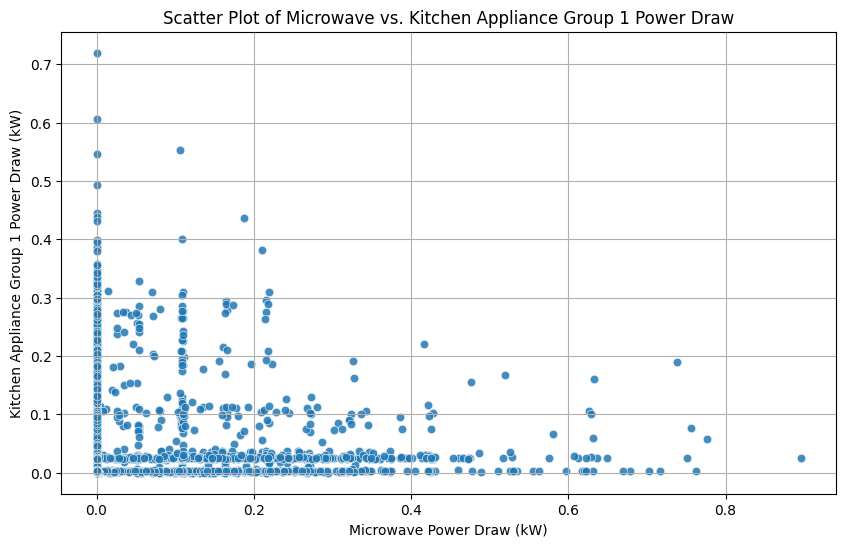

In [131]:
# Scatter plot: microwave1 vs kitchenapp1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_3938, x='microwave1', y='kitchenapp1', alpha=0.6)
plt.xlabel('Microwave Power Draw (kW)')
plt.ylabel('Kitchen Appliance Group 1 Power Draw (kW)')
plt.title('Scatter Plot of Microwave vs. Kitchen Appliance Group 1 Power Draw')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Grid Import/Export Over Time')

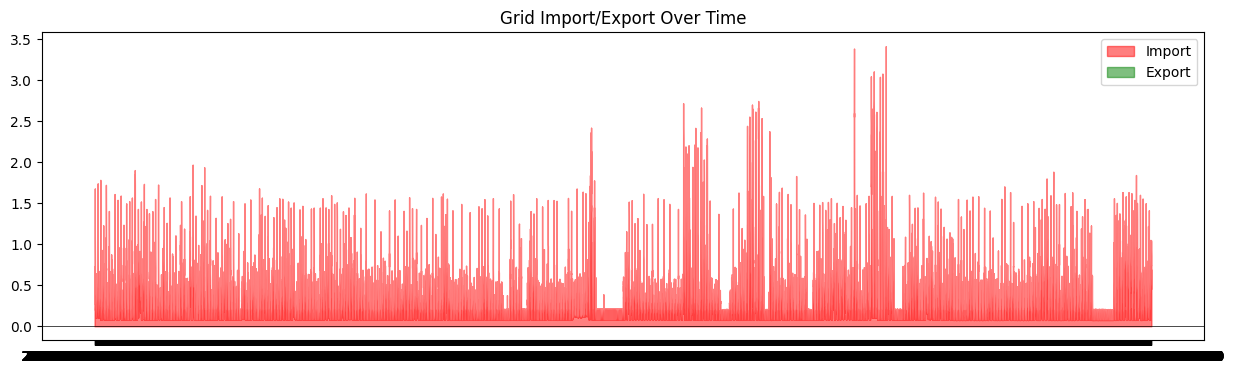

In [132]:
plt.figure(figsize=(15, 4))
plt.fill_between(df_3938['time'], df_3938['grid'], where=(df_3938['grid'] >= 0), label='Import', color='red', alpha=0.5)
plt.fill_between(df_3938['time'], df_3938['grid'], where=(df_3938['grid'] < 0), label='Export', color='green', alpha=0.5)
plt.axhline(0, color='black', lw=0.5)
plt.legend(); plt.title('Grid Import/Export Over Time')

#### All units

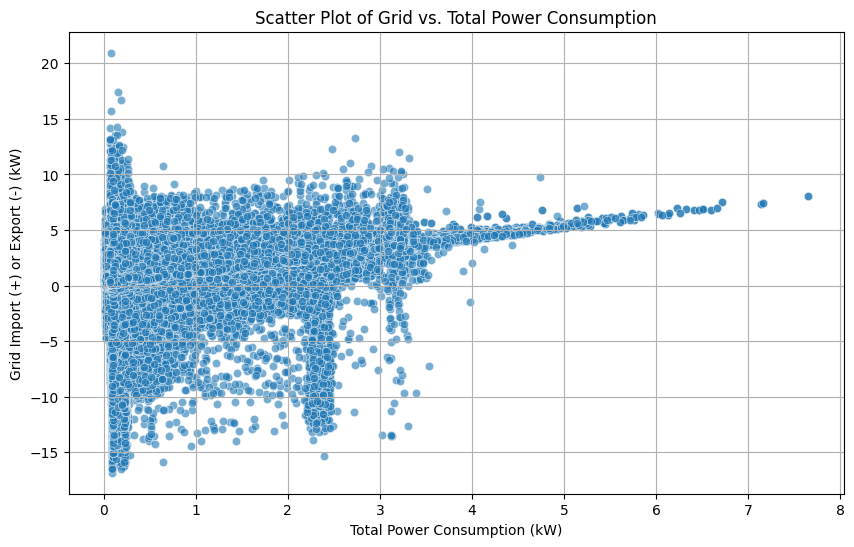

In [133]:
# Scatter plot: Grid vs total_power
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_power', y='grid', alpha=0.6)
plt.xlabel('Total Power Consumption (kW)')
plt.ylabel('Grid Import (+) or Export (-) (kW)')
plt.title('Scatter Plot of Grid vs. Total Power Consumption')
plt.grid(True)
plt.show()

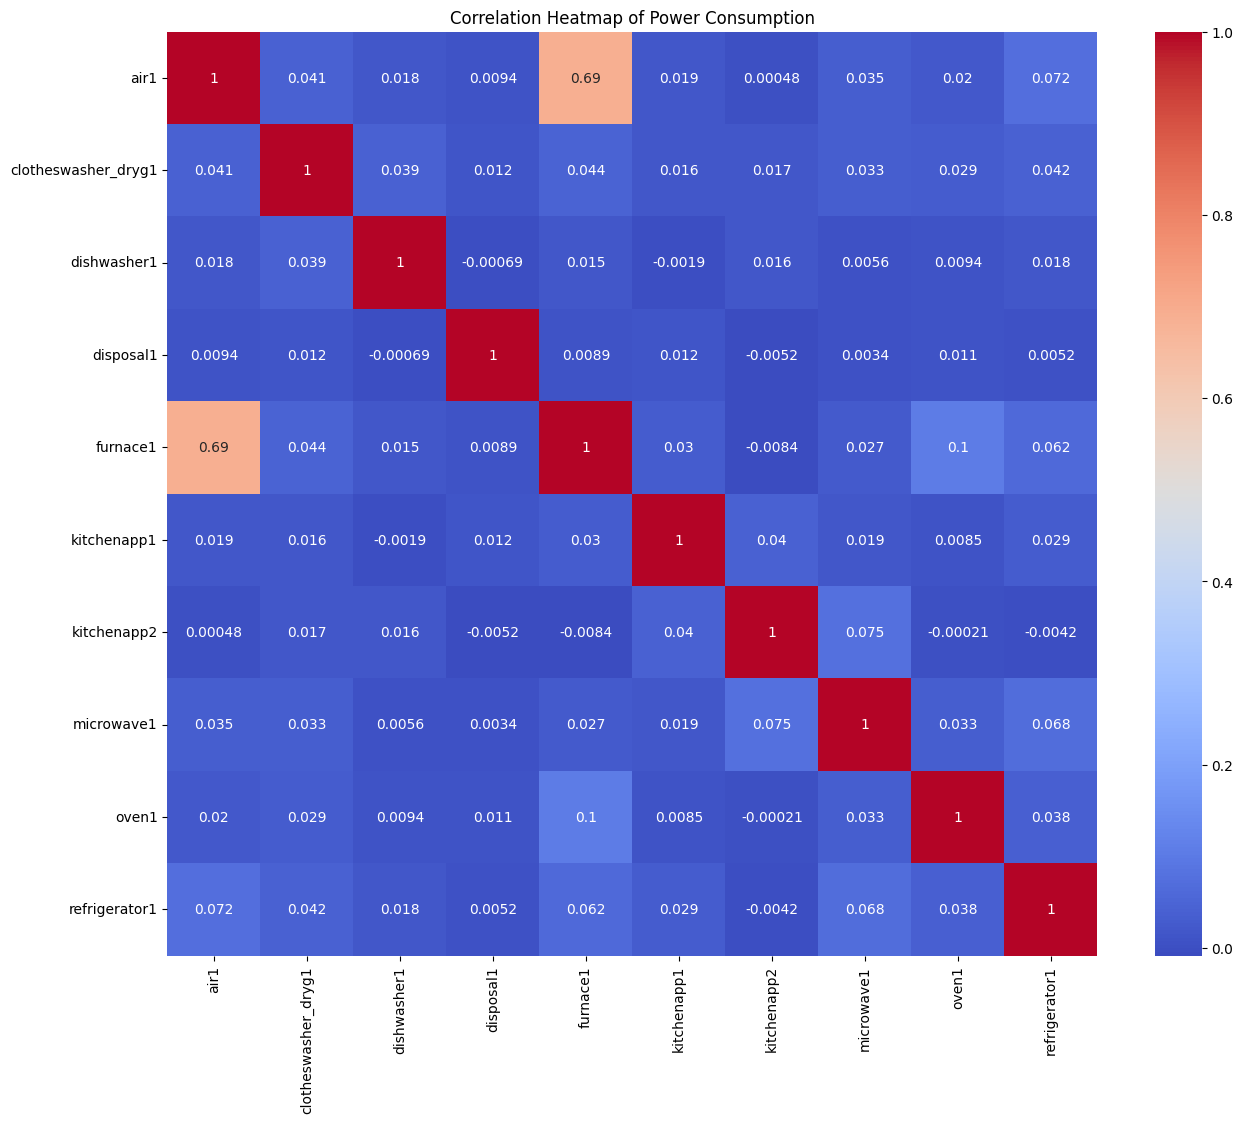

In [134]:
plt.figure(figsize=(15, 12))
corr = df[power_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Power Consumption')
plt.show()

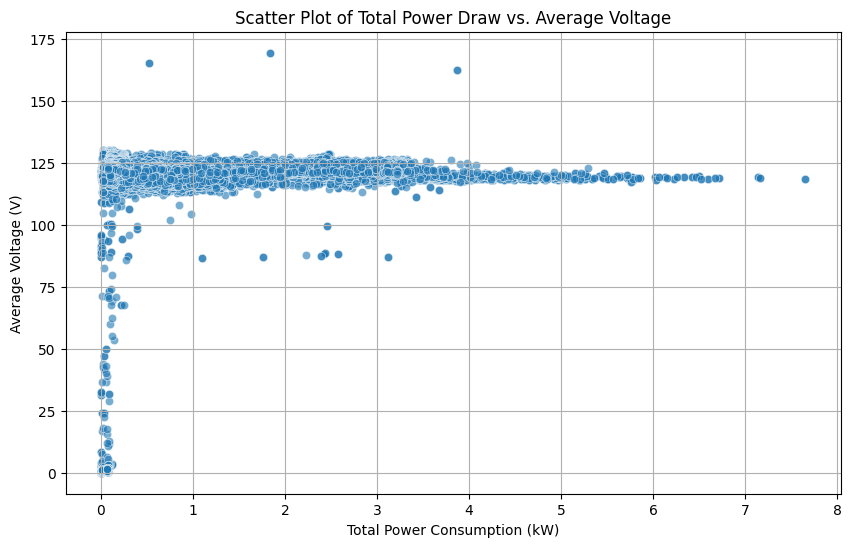

In [135]:
# Scatter plot: Voltage vs total power draw (using the average of leg1v and leg2v for voltage)
df['average_voltage'] = (df['leg1v'] + df['leg2v']) / 2
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_power', y='average_voltage', alpha=0.6)
plt.xlabel('Total Power Consumption (kW)')
plt.ylabel('Average Voltage (V)')
plt.title('Scatter Plot of Total Power Draw vs. Average Voltage')
plt.grid(True)
plt.show()

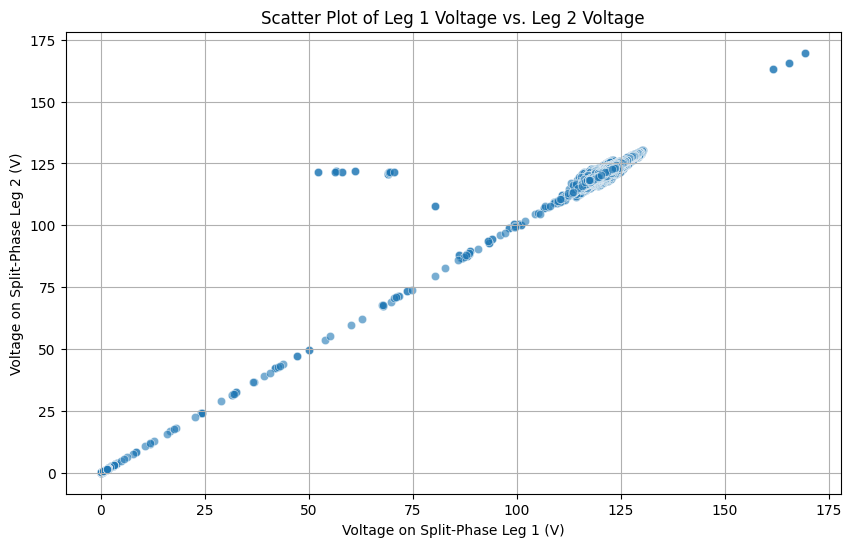

In [136]:
# Scatter plot: leg1v vs leg2v
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='leg1v', y='leg2v', alpha=0.6)
plt.xlabel('Voltage on Split-Phase Leg 1 (V)')
plt.ylabel('Voltage on Split-Phase Leg 2 (V)')
plt.title('Scatter Plot of Leg 1 Voltage vs. Leg 2 Voltage')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


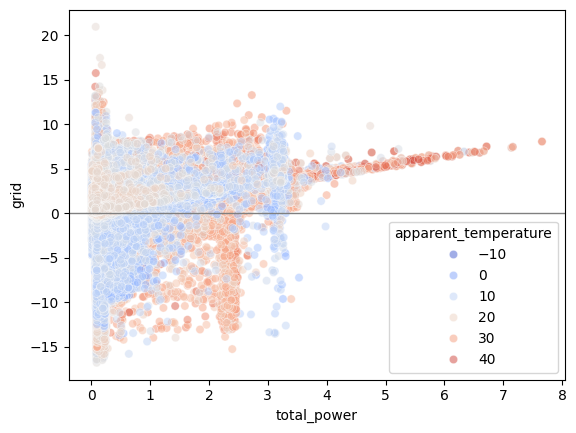

In [138]:
sns.scatterplot(data=df, x='total_power', y='grid', hue='apparent_temperature', palette='coolwarm', alpha=0.5)
plt.axhline(0, color='gray', lw=1)